In [1]:
import pandas as pd
from collections import defaultdict
import warnings
import visualize
import neat
import multiprocessing
import os
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[:1617]
y = digits.target[:1617]

In [3]:
necoc = 100
generations = int(1500/necoc)
generations

15

In [4]:
def softmax(x, axis=1):
    # 计算每行的最大值
    row_max = x.max(axis=axis)
 
    # 每行元素都需要减去对应的最大值，否则求exp(x)会溢出，导致inf情况
    row_max=row_max.reshape(-1, 1)
    x = x - row_max
 
    # 计算e的指数次幂
    x_exp = np.exp(x)
    x_sum = np.sum(x_exp, axis=axis, keepdims=True)
    s = x_exp / x_sum
    return s

In [5]:
def get_winner(class1):
    
    numbers = [*range(10)] # number 2 > number 1
    number_of_classification = len(numbers)
    #number_of_sampling = 100

    list_y = y.tolist()
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

        
    class2 = []

    class1_indexes = []
    class2_indexes = []

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)

    print("number of class1:{}".format(len(class1_label)))
    print("number of class2:{}".format(len(class2_label)))

    samplesize = 1617
    x_inputs =[tuple(c) for c in X[class1_indexes].tolist()] + [tuple(c) for c in X[class2_indexes].tolist()]
    x_outputs = [tuple([c]) for c in class1_label + class2_label]
    
    
    def eval_genomes(genomes, config):
        for genome_id, genome in genomes:
            net = neat.nn.FeedForwardNetwork.create(genome, config)

            outputs = []
            for xi in x_inputs:
                output = net.activate(xi)
                outputs.append(output)


            px_outputs = softmax(np.array(outputs).reshape(samplesize, 2), axis=1)
            # the index of maximum in each line
            pred_outputs = np.argmax(px_outputs, axis = 1)
            real_outputs = np.array(x_outputs).reshape(samplesize,)

            acc = np.sum(pred_outputs == real_outputs)/samplesize

            genome.fitness = acc

    def run(config_file):
        # Load configuration.
        config = neat.Config(
            neat.DefaultGenome,
            neat.DefaultReproduction,
            neat.DefaultSpeciesSet,
            neat.DefaultStagnation,
            config_file,
        )

        # Create the population, which is the top-level object for a NEAT run.
        p = neat.Population(config)

        # add a stdout reporter to show progress in the terminal
        reporter = neat.StdOutReporter(False)
        p.add_reporter(reporter)
        stats = neat.StatisticsReporter()
        p.add_reporter(stats)
        #checkpointer = neat.Checkpointer(100)
        #p.add_reporter(checkpointer)
        # Run for up to 300 generations.
        winner = p.run(eval_genomes, generations)

        return [stats, winner]
    
    local_dir = os.getcwd()
    config_path = os.path.join(local_dir, "config-feedforward-mnist2")
    [stats, winner] = run(config_path)
    
    return winner

In [6]:
import numpy as np
import random
while True:
    number_codes = []
    for i in range(2**(10-1), 2**10-1):
        for j in bin(i).split('b')[1]:
            number_codes.append(int(j))
    number_codes = np.array(number_codes).reshape(2**9 - 1,10).T     

    slice = random.sample(range(511), necoc)

    number_codes = number_codes[:,slice].tolist()

    classes = []
    for i in range(necoc):
        code_list = np.array(number_codes).T[i]
        classes.append(np.where(code_list==1)[0].tolist())

    matrix_errors = []

    for i in range(9):
        for j in range(i+1,10):
            matrix_errors.append(necoc - np.sum(np.array(number_codes[i]) == np.array(number_codes[j])))
    min_error = np.min(matrix_errors)
    if min_error != 0:
        print(min_error)
        #print(number_codes)
        break

42


In [7]:
len(number_codes[0])

100

In [8]:
winner_list = []

for class1 in classes:
    winner = get_winner(class1)
    winner_list.append(winner)

number of class1:1136
number of class2:481

 ****** Running generation 0 ****** 

Population's average fitness: 0.47193 stdev: 0.15499
Best fitness: 0.76376 - size: (2, 13) - species 1 - id 153
Average adjusted fitness: 0.277
Mean genetic distance 2.889, standard deviation 0.472
Population of 201 members in 21 species
Total extinctions: 0
Generation time: 21.424 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56577 stdev: 0.14793
Best fitness: 0.79530 - size: (3, 15) - species 1 - id 363
Average adjusted fitness: 0.322
Mean genetic distance 2.966, standard deviation 0.456
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.543 sec (20.983 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.61074 stdev: 0.14438
Best fitness: 0.79530 - size: (3, 15) - species 21 - id 363
Average adjusted fitness: 0.328
Mean genetic distance 2.983, standard deviation 0.471
Population of 199 members in 29 species
Total exti

Population's average fitness: 0.62493 stdev: 0.09965
Best fitness: 0.79097 - size: (4, 17) - species 16 - id 1445
Average adjusted fitness: 0.358
Mean genetic distance 3.121, standard deviation 0.492
Population of 196 members in 34 species
Total extinctions: 0
Generation time: 28.673 sec (25.895 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63539 stdev: 0.09241
Best fitness: 0.79097 - size: (4, 17) - species 16 - id 1445
Average adjusted fitness: 0.226
Mean genetic distance 3.122, standard deviation 0.493
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 28.764 sec (26.751 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63462 stdev: 0.09671
Best fitness: 0.79406 - size: (5, 16) - species 15 - id 1750
Average adjusted fitness: 0.212
Mean genetic distance 3.128, standard deviation 0.494
Population of 199 members in 35 species
Total extinctions: 0
Generation time: 26.561 sec (27.173 average)

 

Population's average fitness: 0.55852 stdev: 0.07971
Best fitness: 0.76871 - size: (3, 15) - species 8 - id 543
Average adjusted fitness: 0.222
Mean genetic distance 2.973, standard deviation 0.492
Population of 202 members in 25 species
Total extinctions: 0
Generation time: 24.535 sec (22.517 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57997 stdev: 0.07109
Best fitness: 0.76871 - size: (3, 15) - species 8 - id 543
Average adjusted fitness: 0.146
Mean genetic distance 2.983, standard deviation 0.502
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 34.965 sec (25.007 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58459 stdev: 0.07549
Best fitness: 0.76871 - size: (3, 15) - species 8 - id 543
Average adjusted fitness: 0.202
Mean genetic distance 3.031, standard deviation 0.505
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 32.531 sec (26.261 average)

 ****** R

Population's average fitness: 0.62396 stdev: 0.11289
Best fitness: 0.78169 - size: (5, 20) - species 29 - id 1461
Average adjusted fitness: 0.326
Mean genetic distance 3.165, standard deviation 0.507
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 22.448 sec (21.114 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62864 stdev: 0.11441
Best fitness: 0.79159 - size: (8, 25) - species 32 - id 2040
Average adjusted fitness: 0.322
Mean genetic distance 3.193, standard deviation 0.502
Population of 201 members in 36 species
Total extinctions: 0
Generation time: 22.368 sec (21.411 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.63271 stdev: 0.11494
Best fitness: 0.79159 - size: (8, 25) - species 32 - id 2040
Average adjusted fitness: 0.338
Mean genetic distance 3.199, standard deviation 0.513
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 22.828 sec (21.678 average)
nu

Population's average fitness: 0.62818 stdev: 0.12204
Best fitness: 0.77056 - size: (2, 14) - species 27 - id 338
Average adjusted fitness: 0.333
Mean genetic distance 3.085, standard deviation 0.529
Population of 192 members in 30 species
Total extinctions: 0
Generation time: 20.806 sec (19.388 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62266 stdev: 0.12718
Best fitness: 0.77056 - size: (5, 18) - species 2 - id 1229
Average adjusted fitness: 0.329
Mean genetic distance 3.071, standard deviation 0.526
Population of 194 members in 31 species
Total extinctions: 0
Generation time: 20.177 sec (19.487 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63746 stdev: 0.12616
Best fitness: 0.77056 - size: (5, 18) - species 2 - id 1229
Average adjusted fitness: 0.366
Mean genetic distance 3.092, standard deviation 0.535
Population of 200 members in 31 species
Total extinctions: 0
Generation time: 20.718 sec (19.623 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.52413 stdev: 0.08565
Best fitness: 0.72851 - size: (2, 13) - species 6 - id 155
Average adjusted fitness: 0.207
Mean genetic distance 2.824, standard deviation 0.476
Population of 199 members in 16 species
Total extinctions: 0
Generation time: 17.613 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56350 stdev: 0.08343
Best fitness: 0.72851 - size: (2, 13) - species 6 - id 155
Average adjusted fitness: 0.213
Mean genetic distance 2.979, standard deviation 0.498
Population of 198 members in 26 species
Total extinctions: 0
Generation time: 18.298 sec (17.956 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57275 stdev: 0.09089
Best fitness: 0.72851 - size: (2, 13) - species 1 - id 155
Average adjusted fitness: 0.251
Mean genetic distance 3.038, standard deviation 0.509
Population of 197 members in 26 species
Total extinctions: 0
Generation time: 19.103 sec (18.3

Population's average fitness: 0.80452 stdev: 0.19013
Best fitness: 0.94310 - size: (6, 24) - species 27 - id 1332
Average adjusted fitness: 0.705
Mean genetic distance 3.034, standard deviation 0.504
Population of 203 members in 36 species
Total extinctions: 0
Generation time: 21.548 sec (20.106 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.78936 stdev: 0.21678
Best fitness: 0.94310 - size: (6, 24) - species 27 - id 1332
Average adjusted fitness: 0.685
Mean genetic distance 3.013, standard deviation 0.505
Population of 204 members in 36 species
Total extinctions: 0
Generation time: 21.752 sec (20.545 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.81661 stdev: 0.18153
Best fitness: 0.94310 - size: (6, 24) - species 27 - id 1332
Average adjusted fitness: 0.715
Mean genetic distance 3.001, standard deviation 0.499
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.883 sec (20.883 average)

 

Population's average fitness: 0.58093 stdev: 0.10519
Best fitness: 0.79344 - size: (4, 16) - species 22 - id 672
Average adjusted fitness: 0.254
Mean genetic distance 3.058, standard deviation 0.467
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 20.100 sec (18.804 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58007 stdev: 0.09645
Best fitness: 0.80891 - size: (3, 15) - species 28 - id 789
Average adjusted fitness: 0.181
Mean genetic distance 3.107, standard deviation 0.469
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 21.078 sec (19.259 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58964 stdev: 0.10159
Best fitness: 0.80891 - size: (3, 15) - species 28 - id 789
Average adjusted fitness: 0.333
Mean genetic distance 3.118, standard deviation 0.459
Population of 200 members in 37 species
Total extinctions: 0
Generation time: 21.102 sec (19.566 average)

 *****

Population's average fitness: 0.60496 stdev: 0.09551
Best fitness: 0.77427 - size: (6, 25) - species 20 - id 1716
Average adjusted fitness: 0.293
Mean genetic distance 3.192, standard deviation 0.483
Population of 207 members in 40 species
Total extinctions: 0
Generation time: 23.883 sec (21.801 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61007 stdev: 0.09352
Best fitness: 0.77427 - size: (6, 25) - species 20 - id 1716
Average adjusted fitness: 0.298
Mean genetic distance 3.199, standard deviation 0.481
Population of 206 members in 40 species
Total extinctions: 0
Generation time: 23.469 sec (22.171 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61494 stdev: 0.08816
Best fitness: 0.77427 - size: (6, 25) - species 20 - id 1716
Average adjusted fitness: 0.306
Mean genetic distance 3.197, standard deviation 0.477
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 24.020 sec (22.499 average)
nu

Population's average fitness: 0.68235 stdev: 0.11042
Best fitness: 0.83117 - size: (3, 15) - species 17 - id 949
Average adjusted fitness: 0.418
Mean genetic distance 3.103, standard deviation 0.490
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 20.201 sec (19.710 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69869 stdev: 0.09162
Best fitness: 0.83797 - size: (5, 19) - species 21 - id 1213
Average adjusted fitness: 0.369
Mean genetic distance 3.112, standard deviation 0.488
Population of 199 members in 39 species
Total extinctions: 0
Generation time: 21.352 sec (19.915 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69164 stdev: 0.11165
Best fitness: 0.83797 - size: (5, 19) - species 21 - id 1213
Average adjusted fitness: 0.495
Mean genetic distance 3.132, standard deviation 0.482
Population of 207 members in 39 species
Total extinctions: 0
Generation time: 21.776 sec (20.122 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.50200 stdev: 0.06781
Best fitness: 0.70315 - size: (2, 13) - species 2 - id 81
Average adjusted fitness: 0.196
Mean genetic distance 2.875, standard deviation 0.451
Population of 200 members in 25 species
Total extinctions: 0
Generation time: 17.234 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54040 stdev: 0.06878
Best fitness: 0.70315 - size: (2, 13) - species 5 - id 81
Average adjusted fitness: 0.220
Mean genetic distance 2.952, standard deviation 0.475
Population of 199 members in 25 species
Total extinctions: 0
Generation time: 18.368 sec (17.801 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55433 stdev: 0.07830
Best fitness: 0.73840 - size: (3, 15) - species 17 - id 462
Average adjusted fitness: 0.228
Mean genetic distance 2.938, standard deviation 0.438
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 18.832 sec (18.14

Population's average fitness: 0.60962 stdev: 0.09857
Best fitness: 0.75572 - size: (4, 17) - species 31 - id 1214
Average adjusted fitness: 0.288
Mean genetic distance 3.072, standard deviation 0.474
Population of 197 members in 38 species
Total extinctions: 0
Generation time: 21.572 sec (20.530 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60738 stdev: 0.10099
Best fitness: 0.75572 - size: (4, 17) - species 31 - id 1214
Average adjusted fitness: 0.285
Mean genetic distance 3.077, standard deviation 0.467
Population of 200 members in 38 species
Total extinctions: 0
Generation time: 21.968 sec (21.009 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61262 stdev: 0.10292
Best fitness: 0.75572 - size: (4, 17) - species 31 - id 1214
Average adjusted fitness: 0.292
Mean genetic distance 3.065, standard deviation 0.472
Population of 201 members in 38 species
Total extinctions: 0
Generation time: 22.801 sec (21.432 average)

 

Population's average fitness: 0.57188 stdev: 0.10149
Best fitness: 0.80519 - size: (3, 13) - species 15 - id 586
Average adjusted fitness: 0.230
Mean genetic distance 3.085, standard deviation 0.494
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 19.970 sec (18.724 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.58665 stdev: 0.10016
Best fitness: 0.80519 - size: (3, 13) - species 15 - id 586
Average adjusted fitness: 0.273
Mean genetic distance 3.115, standard deviation 0.481
Population of 201 members in 35 species
Total extinctions: 0
Generation time: 20.664 sec (19.112 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59658 stdev: 0.10377
Best fitness: 0.80519 - size: (3, 13) - species 35 - id 586
Average adjusted fitness: 0.298
Mean genetic distance 3.161, standard deviation 0.479
Population of 200 members in 39 species
Total extinctions: 0
Generation time: 21.407 sec (19.494 average)

 *****

Population's average fitness: 0.60509 stdev: 0.09270
Best fitness: 0.78664 - size: (4, 16) - species 40 - id 1689
Average adjusted fitness: 0.222
Mean genetic distance 3.161, standard deviation 0.450
Population of 199 members in 44 species
Total extinctions: 0
Generation time: 22.989 sec (21.432 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60731 stdev: 0.09724
Best fitness: 0.81818 - size: (4, 16) - species 40 - id 1928
Average adjusted fitness: 0.230
Mean genetic distance 3.158, standard deviation 0.448
Population of 205 members in 45 species
Total extinctions: 0
Generation time: 22.808 sec (21.754 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61103 stdev: 0.09376
Best fitness: 0.81818 - size: (4, 16) - species 40 - id 1928
Average adjusted fitness: 0.263
Mean genetic distance 3.169, standard deviation 0.449
Population of 199 members in 45 species
Total extinctions: 0
Generation time: 24.024 sec (22.128 average)
nu

Population's average fitness: 0.57125 stdev: 0.07081
Best fitness: 0.70501 - size: (4, 17) - species 25 - id 1142
Average adjusted fitness: 0.208
Mean genetic distance 2.974, standard deviation 0.508
Population of 202 members in 29 species
Total extinctions: 0
Generation time: 20.680 sec (19.566 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.56783 stdev: 0.07210
Best fitness: 0.70501 - size: (4, 17) - species 25 - id 1142
Average adjusted fitness: 0.210
Mean genetic distance 2.974, standard deviation 0.516
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 21.225 sec (19.773 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.56885 stdev: 0.07647
Best fitness: 0.70501 - size: (4, 17) - species 25 - id 1142
Average adjusted fitness: 0.198
Mean genetic distance 2.984, standard deviation 0.522
Population of 203 members in 29 species
Total extinctions: 0
Generation time: 21.229 sec (19.935 average)

 **


 ****** Running generation 0 ****** 

Population's average fitness: 0.45709 stdev: 0.14306
Best fitness: 0.76562 - size: (2, 13) - species 1 - id 185
Average adjusted fitness: 0.244
Mean genetic distance 2.851, standard deviation 0.482
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 17.591 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56268 stdev: 0.14686
Best fitness: 0.80705 - size: (2, 13) - species 3 - id 350
Average adjusted fitness: 0.365
Mean genetic distance 2.993, standard deviation 0.481
Population of 199 members in 28 species
Total extinctions: 0
Generation time: 18.481 sec (18.036 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.60591 stdev: 0.14013
Best fitness: 0.83117 - size: (4, 16) - species 13 - id 427
Average adjusted fitness: 0.374
Mean genetic distance 3.049, standard deviation 0.476
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 19.599 sec (18.

Population's average fitness: 0.63050 stdev: 0.10504
Best fitness: 0.80829 - size: (4, 20) - species 6 - id 1144
Average adjusted fitness: 0.382
Mean genetic distance 3.079, standard deviation 0.531
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 21.592 sec (20.155 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.62252 stdev: 0.11144
Best fitness: 0.80829 - size: (4, 20) - species 6 - id 1144
Average adjusted fitness: 0.271
Mean genetic distance 3.095, standard deviation 0.532
Population of 203 members in 31 species
Total extinctions: 0
Generation time: 21.259 sec (20.460 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63898 stdev: 0.10642
Best fitness: 0.80829 - size: (4, 20) - species 6 - id 1144
Average adjusted fitness: 0.313
Mean genetic distance 3.086, standard deviation 0.499
Population of 197 members in 31 species
Total extinctions: 0
Generation time: 22.022 sec (20.785 average)

 ***

Population's average fitness: 0.59008 stdev: 0.08209
Best fitness: 0.73840 - size: (3, 14) - species 3 - id 349
Average adjusted fitness: 0.209
Mean genetic distance 3.035, standard deviation 0.495
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 20.047 sec (19.031 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59134 stdev: 0.08325
Best fitness: 0.73840 - size: (3, 14) - species 3 - id 349
Average adjusted fitness: 0.256
Mean genetic distance 3.053, standard deviation 0.483
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 20.784 sec (19.382 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.59609 stdev: 0.07569
Best fitness: 0.75325 - size: (6, 20) - species 3 - id 956
Average adjusted fitness: 0.207
Mean genetic distance 3.108, standard deviation 0.496
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 21.066 sec (19.662 average)

 ****** R

Population's average fitness: 0.60059 stdev: 0.08117
Best fitness: 0.74954 - size: (3, 15) - species 1 - id 345
Average adjusted fitness: 0.276
Mean genetic distance 3.171, standard deviation 0.483
Population of 205 members in 39 species
Total extinctions: 0
Generation time: 22.974 sec (21.669 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.60222 stdev: 0.08198
Best fitness: 0.76314 - size: (5, 18) - species 2 - id 2037
Average adjusted fitness: 0.228
Mean genetic distance 3.198, standard deviation 0.482
Population of 202 members in 39 species
Total extinctions: 0
Generation time: 23.476 sec (22.007 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.60392 stdev: 0.08672
Best fitness: 0.78108 - size: (5, 19) - species 34 - id 2162
Average adjusted fitness: 0.239
Mean genetic distance 3.198, standard deviation 0.484
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 23.079 sec (22.238 average)
numbe

Population's average fitness: 0.57947 stdev: 0.07933
Best fitness: 0.73593 - size: (4, 18) - species 14 - id 965
Average adjusted fitness: 0.204
Mean genetic distance 3.223, standard deviation 0.496
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 21.081 sec (19.959 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.57944 stdev: 0.07976
Best fitness: 0.73593 - size: (4, 18) - species 14 - id 965
Average adjusted fitness: 0.261
Mean genetic distance 3.230, standard deviation 0.499
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.077 sec (20.099 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.58813 stdev: 0.07599
Best fitness: 0.73593 - size: (4, 18) - species 14 - id 965
Average adjusted fitness: 0.200
Mean genetic distance 3.249, standard deviation 0.490
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.928 sec (20.302 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.53813 stdev: 0.14237
Best fitness: 0.75077 - size: (2, 13) - species 5 - id 82
Average adjusted fitness: 0.275
Mean genetic distance 2.909, standard deviation 0.456
Population of 201 members in 24 species
Total extinctions: 0
Generation time: 18.983 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61448 stdev: 0.13078
Best fitness: 0.76994 - size: (3, 15) - species 5 - id 339
Average adjusted fitness: 0.352
Mean genetic distance 2.999, standard deviation 0.481
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 18.744 sec (18.863 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.64102 stdev: 0.12820
Best fitness: 0.78726 - size: (4, 17) - species 2 - id 534
Average adjusted fitness: 0.358
Mean genetic distance 3.039, standard deviation 0.504
Population of 201 members in 31 species
Total extinctions: 0
Generation time: 19.640 sec (19.12

Population's average fitness: 0.60896 stdev: 0.08461
Best fitness: 0.74459 - size: (4, 18) - species 5 - id 988
Average adjusted fitness: 0.257
Mean genetic distance 3.091, standard deviation 0.531
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 22.353 sec (20.098 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61364 stdev: 0.08087
Best fitness: 0.74459 - size: (4, 18) - species 5 - id 988
Average adjusted fitness: 0.253
Mean genetic distance 3.068, standard deviation 0.530
Population of 200 members in 35 species
Total extinctions: 0
Generation time: 21.836 sec (20.543 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61336 stdev: 0.08504
Best fitness: 0.74459 - size: (4, 18) - species 5 - id 988
Average adjusted fitness: 0.258
Mean genetic distance 3.131, standard deviation 0.530
Population of 202 members in 37 species
Total extinctions: 0
Generation time: 22.981 sec (20.986 average)

 ******

Population's average fitness: 0.81995 stdev: 0.16855
Best fitness: 0.95238 - size: (2, 13) - species 4 - id 382
Average adjusted fitness: 0.698
Mean genetic distance 3.005, standard deviation 0.505
Population of 205 members in 26 species
Total extinctions: 0
Generation time: 20.260 sec (19.016 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.80877 stdev: 0.18303
Best fitness: 0.95238 - size: (2, 13) - species 4 - id 382
Average adjusted fitness: 0.701
Mean genetic distance 3.003, standard deviation 0.501
Population of 199 members in 26 species
Total extinctions: 0
Generation time: 20.586 sec (19.330 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.82322 stdev: 0.16738
Best fitness: 0.95238 - size: (2, 13) - species 4 - id 382
Average adjusted fitness: 0.720
Mean genetic distance 3.009, standard deviation 0.507
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 20.270 sec (19.486 average)

 ****** R

Population's average fitness: 0.68586 stdev: 0.09963
Best fitness: 0.82993 - size: (5, 18) - species 22 - id 1729
Average adjusted fitness: 0.386
Mean genetic distance 3.209, standard deviation 0.490
Population of 197 members in 47 species
Total extinctions: 0
Generation time: 22.599 sec (22.000 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67500 stdev: 0.12079
Best fitness: 0.82993 - size: (5, 18) - species 22 - id 1729
Average adjusted fitness: 0.391
Mean genetic distance 3.197, standard deviation 0.489
Population of 204 members in 47 species
Total extinctions: 0
Generation time: 22.228 sec (22.189 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.67643 stdev: 0.11370
Best fitness: 0.83055 - size: (3, 16) - species 23 - id 1937
Average adjusted fitness: 0.374
Mean genetic distance 3.207, standard deviation 0.489
Population of 198 members in 47 species
Total extinctions: 0
Generation time: 23.629 sec (22.417 average)
nu

Population's average fitness: 0.61192 stdev: 0.08167
Best fitness: 0.77613 - size: (4, 16) - species 10 - id 659
Average adjusted fitness: 0.234
Mean genetic distance 3.144, standard deviation 0.479
Population of 193 members in 39 species
Total extinctions: 0
Generation time: 21.353 sec (20.106 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61659 stdev: 0.07927
Best fitness: 0.77984 - size: (4, 17) - species 10 - id 1211
Average adjusted fitness: 0.228
Mean genetic distance 3.163, standard deviation 0.485
Population of 193 members in 41 species
Total extinctions: 0
Generation time: 21.469 sec (20.276 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62186 stdev: 0.07460
Best fitness: 0.77984 - size: (4, 17) - species 10 - id 1211
Average adjusted fitness: 0.275
Mean genetic distance 3.195, standard deviation 0.485
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 21.185 sec (20.377 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.51653 stdev: 0.08818
Best fitness: 0.71243 - size: (2, 13) - species 1 - id 15
Average adjusted fitness: 0.268
Mean genetic distance 2.937, standard deviation 0.497
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 17.735 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.54606 stdev: 0.09455
Best fitness: 0.75077 - size: (3, 15) - species 1 - id 363
Average adjusted fitness: 0.287
Mean genetic distance 2.964, standard deviation 0.491
Population of 201 members in 29 species
Total extinctions: 0
Generation time: 19.157 sec (18.446 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.56554 stdev: 0.09857
Best fitness: 0.75077 - size: (3, 15) - species 6 - id 363
Average adjusted fitness: 0.267
Mean genetic distance 2.997, standard deviation 0.504
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.622 sec (18.83

Population's average fitness: 0.60710 stdev: 0.10288
Best fitness: 0.77242 - size: (5, 20) - species 20 - id 1258
Average adjusted fitness: 0.284
Mean genetic distance 3.077, standard deviation 0.490
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 22.447 sec (20.270 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61455 stdev: 0.10369
Best fitness: 0.77242 - size: (5, 20) - species 20 - id 1258
Average adjusted fitness: 0.204
Mean genetic distance 3.080, standard deviation 0.487
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 22.092 sec (20.748 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61784 stdev: 0.09870
Best fitness: 0.77613 - size: (5, 19) - species 13 - id 1839
Average adjusted fitness: 0.202
Mean genetic distance 3.070, standard deviation 0.492
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 22.344 sec (21.112 average)

 

Population's average fitness: 0.61865 stdev: 0.13577
Best fitness: 0.78293 - size: (2, 12) - species 14 - id 649
Average adjusted fitness: 0.423
Mean genetic distance 3.016, standard deviation 0.447
Population of 203 members in 37 species
Total extinctions: 0
Generation time: 20.747 sec (19.195 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62507 stdev: 0.13660
Best fitness: 0.80829 - size: (3, 15) - species 17 - id 752
Average adjusted fitness: 0.411
Mean genetic distance 3.042, standard deviation 0.469
Population of 209 members in 38 species
Total extinctions: 0
Generation time: 21.345 sec (19.625 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.63882 stdev: 0.13097
Best fitness: 0.83302 - size: (4, 17) - species 14 - id 934
Average adjusted fitness: 0.427
Mean genetic distance 3.085, standard deviation 0.474
Population of 208 members in 39 species
Total extinctions: 0
Generation time: 21.967 sec (20.016 average)

 *****

Population's average fitness: 0.67814 stdev: 0.09810
Best fitness: 0.78231 - size: (4, 16) - species 27 - id 1580
Average adjusted fitness: 0.382
Mean genetic distance 3.165, standard deviation 0.506
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 23.283 sec (21.727 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.67920 stdev: 0.09618
Best fitness: 0.79468 - size: (4, 15) - species 27 - id 1956
Average adjusted fitness: 0.447
Mean genetic distance 3.185, standard deviation 0.496
Population of 202 members in 40 species
Total extinctions: 0
Generation time: 23.681 sec (22.105 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.66581 stdev: 0.11742
Best fitness: 0.79468 - size: (4, 15) - species 27 - id 1956
Average adjusted fitness: 0.405
Mean genetic distance 3.170, standard deviation 0.502
Population of 198 members in 40 species
Total extinctions: 0
Generation time: 22.807 sec (22.328 average)
nu

Population's average fitness: 0.58152 stdev: 0.09959
Best fitness: 0.78788 - size: (4, 16) - species 1 - id 907
Average adjusted fitness: 0.318
Mean genetic distance 3.183, standard deviation 0.496
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 21.416 sec (20.061 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.59262 stdev: 0.09354
Best fitness: 0.78788 - size: (4, 16) - species 1 - id 907
Average adjusted fitness: 0.297
Mean genetic distance 3.170, standard deviation 0.486
Population of 203 members in 42 species
Total extinctions: 0
Generation time: 21.600 sec (20.253 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61131 stdev: 0.09493
Best fitness: 0.78788 - size: (4, 16) - species 1 - id 907
Average adjusted fitness: 0.275
Mean genetic distance 3.219, standard deviation 0.488
Population of 196 members in 43 species
Total extinctions: 0
Generation time: 22.382 sec (20.490 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.49807 stdev: 0.06355
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.174
Mean genetic distance 2.897, standard deviation 0.500
Population of 199 members in 19 species
Total extinctions: 0
Generation time: 17.729 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.52753 stdev: 0.06920
Best fitness: 0.72975 - size: (2, 13) - species 1 - id 168
Average adjusted fitness: 0.214
Mean genetic distance 3.009, standard deviation 0.503
Population of 199 members in 24 species
Total extinctions: 0
Generation time: 18.493 sec (18.111 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.53918 stdev: 0.07444
Best fitness: 0.72975 - size: (2, 13) - species 18 - id 168
Average adjusted fitness: 0.252
Mean genetic distance 3.051, standard deviation 0.520
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 19.217 sec (18.

Population's average fitness: 0.61362 stdev: 0.07385
Best fitness: 0.72294 - size: (5, 16) - species 22 - id 1387
Average adjusted fitness: 0.233
Mean genetic distance 3.163, standard deviation 0.492
Population of 203 members in 46 species
Total extinctions: 0
Generation time: 22.616 sec (20.953 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60796 stdev: 0.08323
Best fitness: 0.72294 - size: (5, 16) - species 22 - id 1387
Average adjusted fitness: 0.305
Mean genetic distance 3.143, standard deviation 0.497
Population of 200 members in 46 species
Total extinctions: 0
Generation time: 23.867 sec (21.588 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60438 stdev: 0.08683
Best fitness: 0.72294 - size: (5, 16) - species 22 - id 1387
Average adjusted fitness: 0.217
Mean genetic distance 3.126, standard deviation 0.491
Population of 211 members in 46 species
Total extinctions: 0
Generation time: 23.023 sec (21.985 average)

 

Population's average fitness: 0.65345 stdev: 0.10946
Best fitness: 0.80148 - size: (2, 13) - species 13 - id 677
Average adjusted fitness: 0.395
Mean genetic distance 3.022, standard deviation 0.502
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 21.061 sec (19.190 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.64240 stdev: 0.12449
Best fitness: 0.80148 - size: (2, 13) - species 13 - id 677
Average adjusted fitness: 0.343
Mean genetic distance 3.015, standard deviation 0.489
Population of 204 members in 33 species
Total extinctions: 0
Generation time: 21.174 sec (19.587 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.66484 stdev: 0.09690
Best fitness: 0.80148 - size: (2, 13) - species 13 - id 677
Average adjusted fitness: 0.356
Mean genetic distance 3.044, standard deviation 0.481
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 21.921 sec (19.976 average)

 *****

Population's average fitness: 0.61741 stdev: 0.07958
Best fitness: 0.74644 - size: (5, 21) - species 10 - id 1542
Average adjusted fitness: 0.224
Mean genetic distance 3.278, standard deviation 0.509
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 24.121 sec (22.590 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62936 stdev: 0.07207
Best fitness: 0.74644 - size: (5, 21) - species 10 - id 1542
Average adjusted fitness: 0.244
Mean genetic distance 3.264, standard deviation 0.511
Population of 205 members in 34 species
Total extinctions: 0
Generation time: 23.397 sec (22.900 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62832 stdev: 0.07658
Best fitness: 0.74644 - size: (5, 21) - species 10 - id 1542
Average adjusted fitness: 0.265
Mean genetic distance 3.262, standard deviation 0.512
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 24.489 sec (23.181 average)
nu

Population's average fitness: 0.61970 stdev: 0.12801
Best fitness: 0.76747 - size: (3, 14) - species 18 - id 831
Average adjusted fitness: 0.305
Mean genetic distance 3.079, standard deviation 0.513
Population of 202 members in 28 species
Total extinctions: 0
Generation time: 21.690 sec (19.916 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.62236 stdev: 0.12748
Best fitness: 0.77551 - size: (7, 23) - species 9 - id 1270
Average adjusted fitness: 0.312
Mean genetic distance 3.092, standard deviation 0.508
Population of 198 members in 30 species
Total extinctions: 0
Generation time: 22.459 sec (20.234 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.63426 stdev: 0.12217
Best fitness: 0.77551 - size: (7, 23) - species 9 - id 1270
Average adjusted fitness: 0.319
Mean genetic distance 3.108, standard deviation 0.502
Population of 201 members in 33 species
Total extinctions: 0
Generation time: 21.677 sec (20.395 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.53605 stdev: 0.13624
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.275
Mean genetic distance 2.964, standard deviation 0.526
Population of 200 members in 21 species
Total extinctions: 0
Generation time: 17.902 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.61023 stdev: 0.12454
Best fitness: 0.74583 - size: (2, 13) - species 1 - id 176
Average adjusted fitness: 0.305
Mean genetic distance 3.044, standard deviation 0.503
Population of 200 members in 29 species
Total extinctions: 0
Generation time: 18.630 sec (18.266 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62591 stdev: 0.11540
Best fitness: 0.77180 - size: (4, 17) - species 5 - id 538
Average adjusted fitness: 0.316
Mean genetic distance 3.104, standard deviation 0.511
Population of 206 members in 29 species
Total extinctions: 0
Generation time: 19.700 sec (18.7

Population's average fitness: 0.63468 stdev: 0.13612
Best fitness: 0.85591 - size: (6, 20) - species 21 - id 1489
Average adjusted fitness: 0.323
Mean genetic distance 3.196, standard deviation 0.486
Population of 200 members in 41 species
Total extinctions: 0
Generation time: 22.618 sec (20.461 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.64763 stdev: 0.13800
Best fitness: 0.85591 - size: (6, 20) - species 21 - id 1489
Average adjusted fitness: 0.343
Mean genetic distance 3.214, standard deviation 0.482
Population of 203 members in 43 species
Total extinctions: 0
Generation time: 22.570 sec (20.983 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63736 stdev: 0.14007
Best fitness: 0.85591 - size: (6, 20) - species 21 - id 1489
Average adjusted fitness: 0.346
Mean genetic distance 3.220, standard deviation 0.487
Population of 202 members in 43 species
Total extinctions: 0
Generation time: 23.084 sec (21.422 average)

 

Population's average fitness: 0.60208 stdev: 0.12820
Best fitness: 0.74892 - size: (2, 13) - species 30 - id 297
Average adjusted fitness: 0.291
Mean genetic distance 3.036, standard deviation 0.495
Population of 196 members in 32 species
Total extinctions: 0
Generation time: 19.668 sec (18.889 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.61955 stdev: 0.11929
Best fitness: 0.77056 - size: (3, 16) - species 29 - id 808
Average adjusted fitness: 0.316
Mean genetic distance 3.018, standard deviation 0.497
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.512 sec (19.014 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60929 stdev: 0.13651
Best fitness: 0.77056 - size: (3, 16) - species 29 - id 808
Average adjusted fitness: 0.320
Mean genetic distance 3.049, standard deviation 0.496
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 20.845 sec (19.319 average)

 *****

Population's average fitness: 0.65616 stdev: 0.11099
Best fitness: 0.85776 - size: (2, 14) - species 4 - id 664
Average adjusted fitness: 0.323
Mean genetic distance 3.013, standard deviation 0.537
Population of 205 members in 28 species
Total extinctions: 0
Generation time: 22.534 sec (20.612 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.65259 stdev: 0.11758
Best fitness: 0.85776 - size: (2, 14) - species 4 - id 664
Average adjusted fitness: 0.276
Mean genetic distance 3.041, standard deviation 0.539
Population of 197 members in 29 species
Total extinctions: 0
Generation time: 22.399 sec (20.909 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64806 stdev: 0.12570
Best fitness: 0.85776 - size: (2, 14) - species 4 - id 664
Average adjusted fitness: 0.381
Mean genetic distance 3.008, standard deviation 0.521
Population of 199 members in 32 species
Total extinctions: 0
Generation time: 21.608 sec (21.084 average)
number o

Population's average fitness: 0.60329 stdev: 0.09488
Best fitness: 0.76314 - size: (4, 18) - species 1 - id 830
Average adjusted fitness: 0.255
Mean genetic distance 3.086, standard deviation 0.505
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 21.603 sec (19.906 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61096 stdev: 0.09911
Best fitness: 0.76314 - size: (4, 18) - species 1 - id 830
Average adjusted fitness: 0.236
Mean genetic distance 3.138, standard deviation 0.503
Population of 198 members in 31 species
Total extinctions: 0
Generation time: 21.685 sec (20.128 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62182 stdev: 0.09358
Best fitness: 0.76314 - size: (4, 18) - species 1 - id 830
Average adjusted fitness: 0.311
Mean genetic distance 3.168, standard deviation 0.499
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 21.357 sec (20.265 average)

 ****** R


 ****** Running generation 0 ****** 

Population's average fitness: 0.50469 stdev: 0.06744
Best fitness: 0.72171 - size: (2, 13) - species 2 - id 133
Average adjusted fitness: 0.203
Mean genetic distance 2.872, standard deviation 0.466
Population of 200 members in 26 species
Total extinctions: 0
Generation time: 17.440 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53816 stdev: 0.07801
Best fitness: 0.75758 - size: (2, 14) - species 14 - id 335
Average adjusted fitness: 0.198
Mean genetic distance 2.994, standard deviation 0.484
Population of 201 members in 32 species
Total extinctions: 0
Generation time: 18.639 sec (18.039 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.54793 stdev: 0.08531
Best fitness: 0.75758 - size: (2, 14) - species 26 - id 335
Average adjusted fitness: 0.192
Mean genetic distance 3.030, standard deviation 0.478
Population of 202 members in 34 species
Total extinctions: 0
Generation time: 19.337 sec (18

Population's average fitness: 0.60881 stdev: 0.08086
Best fitness: 0.74273 - size: (4, 17) - species 17 - id 936
Average adjusted fitness: 0.239
Mean genetic distance 3.166, standard deviation 0.510
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.883 sec (20.008 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.61410 stdev: 0.07681
Best fitness: 0.74273 - size: (4, 17) - species 17 - id 936
Average adjusted fitness: 0.209
Mean genetic distance 3.159, standard deviation 0.497
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 20.848 sec (20.375 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.61334 stdev: 0.08003
Best fitness: 0.74273 - size: (4, 17) - species 17 - id 936
Average adjusted fitness: 0.228
Mean genetic distance 3.136, standard deviation 0.501
Population of 199 members in 33 species
Total extinctions: 0
Generation time: 21.154 sec (20.646 average)

 ***

Population's average fitness: 0.62579 stdev: 0.15729
Best fitness: 0.86642 - size: (4, 17) - species 22 - id 515
Average adjusted fitness: 0.374
Mean genetic distance 3.072, standard deviation 0.481
Population of 200 members in 30 species
Total extinctions: 0
Generation time: 19.826 sec (18.774 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.62963 stdev: 0.15473
Best fitness: 0.86642 - size: (4, 17) - species 12 - id 515
Average adjusted fitness: 0.399
Mean genetic distance 3.082, standard deviation 0.489
Population of 203 members in 30 species
Total extinctions: 0
Generation time: 20.591 sec (19.138 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.64648 stdev: 0.14610
Best fitness: 0.86642 - size: (6, 19) - species 17 - id 971
Average adjusted fitness: 0.407
Mean genetic distance 3.081, standard deviation 0.487
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 21.472 sec (19.527 average)

 *****

Population's average fitness: 0.63260 stdev: 0.09301
Best fitness: 0.78664 - size: (2, 15) - species 8 - id 535
Average adjusted fitness: 0.235
Mean genetic distance 3.145, standard deviation 0.479
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 22.334 sec (21.477 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.62703 stdev: 0.08969
Best fitness: 0.78664 - size: (2, 15) - species 8 - id 535
Average adjusted fitness: 0.238
Mean genetic distance 3.134, standard deviation 0.487
Population of 197 members in 34 species
Total extinctions: 0
Generation time: 23.002 sec (21.753 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.62921 stdev: 0.08873
Best fitness: 0.78664 - size: (2, 15) - species 8 - id 535
Average adjusted fitness: 0.279
Mean genetic distance 3.136, standard deviation 0.485
Population of 201 members in 34 species
Total extinctions: 0
Generation time: 22.482 sec (21.926 average)
number o

Population's average fitness: 0.70225 stdev: 0.17830
Best fitness: 0.84601 - size: (3, 14) - species 7 - id 480
Average adjusted fitness: 0.454
Mean genetic distance 3.070, standard deviation 0.495
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 20.529 sec (19.574 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.69924 stdev: 0.17521
Best fitness: 0.84601 - size: (3, 14) - species 7 - id 480
Average adjusted fitness: 0.453
Mean genetic distance 3.054, standard deviation 0.491
Population of 204 members in 35 species
Total extinctions: 0
Generation time: 20.521 sec (19.693 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.68570 stdev: 0.19006
Best fitness: 0.85900 - size: (6, 20) - species 30 - id 1276
Average adjusted fitness: 0.440
Mean genetic distance 3.025, standard deviation 0.480
Population of 206 members in 36 species
Total extinctions: 0
Generation time: 20.753 sec (19.810 average)

 ******


 ****** Running generation 0 ****** 

Population's average fitness: 0.45121 stdev: 0.20873
Best fitness: 0.85776 - size: (2, 13) - species 2 - id 77
Average adjusted fitness: 0.274
Mean genetic distance 2.972, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.586 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56826 stdev: 0.20624
Best fitness: 0.86271 - size: (3, 14) - species 7 - id 211
Average adjusted fitness: 0.386
Mean genetic distance 3.024, standard deviation 0.470
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 18.958 sec (18.272 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.65088 stdev: 0.18814
Best fitness: 0.86271 - size: (3, 14) - species 7 - id 211
Average adjusted fitness: 0.433
Mean genetic distance 3.070, standard deviation 0.468
Population of 203 members in 39 species
Total extinctions: 0
Generation time: 19.947 sec (18.83

Population's average fitness: 0.62986 stdev: 0.11009
Best fitness: 0.81262 - size: (3, 14) - species 2 - id 319
Average adjusted fitness: 0.308
Mean genetic distance 3.135, standard deviation 0.478
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 22.270 sec (20.646 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63958 stdev: 0.10699
Best fitness: 0.81509 - size: (5, 18) - species 32 - id 1529
Average adjusted fitness: 0.361
Mean genetic distance 3.133, standard deviation 0.478
Population of 201 members in 44 species
Total extinctions: 0
Generation time: 22.734 sec (21.079 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.63732 stdev: 0.11215
Best fitness: 0.81509 - size: (5, 18) - species 32 - id 1529
Average adjusted fitness: 0.393
Mean genetic distance 3.141, standard deviation 0.479
Population of 202 members in 44 species
Total extinctions: 0
Generation time: 22.898 sec (21.485 average)

 **

Population's average fitness: 0.56194 stdev: 0.09685
Best fitness: 0.76809 - size: (4, 17) - species 35 - id 649
Average adjusted fitness: 0.290
Mean genetic distance 3.056, standard deviation 0.469
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.163 sec (19.417 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.57857 stdev: 0.08743
Best fitness: 0.79283 - size: (5, 18) - species 35 - id 789
Average adjusted fitness: 0.234
Mean genetic distance 3.100, standard deviation 0.466
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 21.332 sec (19.800 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.58491 stdev: 0.09619
Best fitness: 0.81138 - size: (2, 14) - species 36 - id 915
Average adjusted fitness: 0.195
Mean genetic distance 3.096, standard deviation 0.456
Population of 202 members in 38 species
Total extinctions: 0
Generation time: 21.541 sec (20.090 average)

 *****

Population's average fitness: 0.65430 stdev: 0.09882
Best fitness: 0.81138 - size: (3, 14) - species 23 - id 1214
Average adjusted fitness: 0.313
Mean genetic distance 3.072, standard deviation 0.514
Population of 193 members in 33 species
Total extinctions: 0
Generation time: 22.403 sec (21.264 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.64418 stdev: 0.10652
Best fitness: 0.81138 - size: (3, 14) - species 23 - id 1214
Average adjusted fitness: 0.282
Mean genetic distance 3.074, standard deviation 0.501
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 19.662 sec (21.205 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.64817 stdev: 0.10381
Best fitness: 0.82375 - size: (4, 16) - species 23 - id 2233
Average adjusted fitness: 0.267
Mean genetic distance 3.068, standard deviation 0.496
Population of 203 members in 33 species
Total extinctions: 0
Generation time: 20.346 sec (21.178 average)
nu

Population's average fitness: 0.70608 stdev: 0.15982
Best fitness: 0.83735 - size: (5, 16) - species 24 - id 811
Average adjusted fitness: 0.488
Mean genetic distance 3.129, standard deviation 0.497
Population of 203 members in 40 species
Total extinctions: 0
Generation time: 19.759 sec (18.485 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.70686 stdev: 0.16197
Best fitness: 0.84848 - size: (5, 20) - species 18 - id 1181
Average adjusted fitness: 0.482
Mean genetic distance 3.141, standard deviation 0.499
Population of 205 members in 40 species
Total extinctions: 0
Generation time: 20.348 sec (18.717 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.69813 stdev: 0.16693
Best fitness: 0.84848 - size: (5, 20) - species 18 - id 1181
Average adjusted fitness: 0.479
Mean genetic distance 3.201, standard deviation 0.501
Population of 204 members in 40 species
Total extinctions: 0
Generation time: 20.344 sec (18.898 average)

 ***


 ****** Running generation 0 ****** 

Population's average fitness: 0.45426 stdev: 0.21686
Best fitness: 0.81942 - size: (2, 13) - species 5 - id 75
Average adjusted fitness: 0.305
Mean genetic distance 2.878, standard deviation 0.468
Population of 202 members in 22 species
Total extinctions: 0
Generation time: 16.010 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.56928 stdev: 0.21006
Best fitness: 0.84725 - size: (3, 15) - species 9 - id 302
Average adjusted fitness: 0.403
Mean genetic distance 2.930, standard deviation 0.480
Population of 200 members in 28 species
Total extinctions: 0
Generation time: 17.727 sec (16.869 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.62432 stdev: 0.19933
Best fitness: 0.84725 - size: (3, 15) - species 6 - id 302
Average adjusted fitness: 0.431
Mean genetic distance 2.991, standard deviation 0.502
Population of 199 members in 30 species
Total extinctions: 0
Generation time: 17.609 sec (17.11

Population's average fitness: 0.58918 stdev: 0.08333
Best fitness: 0.74583 - size: (2, 15) - species 9 - id 836
Average adjusted fitness: 0.251
Mean genetic distance 3.250, standard deviation 0.525
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 20.508 sec (18.790 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.58812 stdev: 0.08410
Best fitness: 0.74583 - size: (2, 15) - species 9 - id 836
Average adjusted fitness: 0.200
Mean genetic distance 3.236, standard deviation 0.529
Population of 205 members in 36 species
Total extinctions: 0
Generation time: 19.888 sec (19.164 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.59538 stdev: 0.08714
Best fitness: 0.74954 - size: (6, 20) - species 4 - id 1784
Average adjusted fitness: 0.218
Mean genetic distance 3.235, standard deviation 0.525
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 21.061 sec (19.567 average)

 *****

Population's average fitness: 0.66068 stdev: 0.11741
Best fitness: 0.82746 - size: (4, 16) - species 23 - id 628
Average adjusted fitness: 0.382
Mean genetic distance 3.139, standard deviation 0.504
Population of 200 members in 33 species
Total extinctions: 0
Generation time: 18.782 sec (17.441 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.65948 stdev: 0.13079
Best fitness: 0.83488 - size: (3, 16) - species 32 - id 830
Average adjusted fitness: 0.373
Mean genetic distance 3.155, standard deviation 0.497
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 18.915 sec (17.736 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.68561 stdev: 0.12419
Best fitness: 0.84663 - size: (4, 17) - species 33 - id 967
Average adjusted fitness: 0.426
Mean genetic distance 3.148, standard deviation 0.504
Population of 196 members in 33 species
Total extinctions: 0
Generation time: 19.287 sec (17.994 average)

 *****

Population's average fitness: 0.59068 stdev: 0.10098
Best fitness: 0.75634 - size: (2, 15) - species 15 - id 1490
Average adjusted fitness: 0.235
Mean genetic distance 3.125, standard deviation 0.499
Population of 198 members in 34 species
Total extinctions: 0
Generation time: 19.766 sec (19.073 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.61360 stdev: 0.08495
Best fitness: 0.75634 - size: (2, 15) - species 15 - id 1490
Average adjusted fitness: 0.242
Mean genetic distance 3.103, standard deviation 0.491
Population of 199 members in 34 species
Total extinctions: 0
Generation time: 19.806 sec (19.274 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.61077 stdev: 0.09134
Best fitness: 0.77489 - size: (6, 19) - species 31 - id 2174
Average adjusted fitness: 0.243
Mean genetic distance 3.162, standard deviation 0.488
Population of 205 members in 35 species
Total extinctions: 0
Generation time: 20.007 sec (19.493 average)
nu

Population's average fitness: 0.60199 stdev: 0.08524
Best fitness: 0.75881 - size: (3, 15) - species 28 - id 638
Average adjusted fitness: 0.269
Mean genetic distance 3.115, standard deviation 0.497
Population of 204 members in 38 species
Total extinctions: 0
Generation time: 19.929 sec (18.346 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.61408 stdev: 0.07950
Best fitness: 0.75881 - size: (3, 15) - species 28 - id 638
Average adjusted fitness: 0.288
Mean genetic distance 3.140, standard deviation 0.491
Population of 199 members in 40 species
Total extinctions: 0
Generation time: 19.740 sec (18.520 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.61162 stdev: 0.08214
Best fitness: 0.75881 - size: (3, 15) - species 28 - id 638
Average adjusted fitness: 0.210
Mean genetic distance 3.124, standard deviation 0.493
Population of 201 members in 40 species
Total extinctions: 0
Generation time: 19.599 sec (18.640 average)

 *****


 ****** Running generation 0 ****** 

Population's average fitness: 0.46152 stdev: 0.09572
Best fitness: 0.71985 - size: (2, 13) - species 3 - id 86
Average adjusted fitness: 0.169
Mean genetic distance 2.844, standard deviation 0.460
Population of 200 members in 22 species
Total extinctions: 0
Generation time: 15.983 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.53738 stdev: 0.09713
Best fitness: 0.71985 - size: (2, 13) - species 7 - id 86
Average adjusted fitness: 0.237
Mean genetic distance 2.963, standard deviation 0.494
Population of 198 members in 27 species
Total extinctions: 0
Generation time: 17.361 sec (16.672 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.55163 stdev: 0.10441
Best fitness: 0.73655 - size: (4, 17) - species 23 - id 509
Average adjusted fitness: 0.262
Mean genetic distance 2.983, standard deviation 0.499
Population of 204 members in 30 species
Total extinctions: 0
Generation time: 17.905 sec (17.08

Population's average fitness: 0.61739 stdev: 0.11123
Best fitness: 0.79406 - size: (4, 17) - species 12 - id 1227
Average adjusted fitness: 0.293
Mean genetic distance 3.174, standard deviation 0.502
Population of 198 members in 36 species
Total extinctions: 0
Generation time: 21.054 sec (19.112 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.63489 stdev: 0.09804
Best fitness: 0.81942 - size: (4, 18) - species 12 - id 1607
Average adjusted fitness: 0.280
Mean genetic distance 3.193, standard deviation 0.493
Population of 200 members in 36 species
Total extinctions: 0
Generation time: 20.626 sec (19.579 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.62174 stdev: 0.10883
Best fitness: 0.81942 - size: (4, 18) - species 12 - id 1607
Average adjusted fitness: 0.274
Mean genetic distance 3.202, standard deviation 0.490
Population of 202 members in 36 species
Total extinctions: 0
Generation time: 20.722 sec (19.914 average)

 

Population's average fitness: 0.56277 stdev: 0.09014
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 120
Average adjusted fitness: 0.200
Mean genetic distance 3.006, standard deviation 0.466
Population of 198 members in 32 species
Total extinctions: 0
Generation time: 19.088 sec (17.807 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.56819 stdev: 0.09561
Best fitness: 0.72356 - size: (2, 13) - species 5 - id 120
Average adjusted fitness: 0.226
Mean genetic distance 3.091, standard deviation 0.475
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 19.021 sec (18.050 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.57939 stdev: 0.09032
Best fitness: 0.73408 - size: (5, 20) - species 12 - id 897
Average adjusted fitness: 0.209
Mean genetic distance 3.129, standard deviation 0.478
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 17.683 sec (17.989 average)

 ****** 

Population's average fitness: 0.75863 stdev: 0.13912
Best fitness: 0.92517 - size: (6, 18) - species 19 - id 1685
Average adjusted fitness: 0.559
Mean genetic distance 3.100, standard deviation 0.519
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.352 sec (17.566 average)

 ****** Running generation 13 ****** 

Population's average fitness: 0.76298 stdev: 0.14749
Best fitness: 0.92517 - size: (6, 18) - species 19 - id 1685
Average adjusted fitness: 0.620
Mean genetic distance 3.104, standard deviation 0.508
Population of 202 members in 30 species
Total extinctions: 0
Generation time: 18.366 sec (17.767 average)

 ****** Running generation 14 ****** 

Population's average fitness: 0.76085 stdev: 0.16124
Best fitness: 0.92703 - size: (7, 19) - species 19 - id 2251
Average adjusted fitness: 0.558
Mean genetic distance 3.155, standard deviation 0.493
Population of 201 members in 30 species
Total extinctions: 0
Generation time: 18.734 sec (17.990 average)
nu

Population's average fitness: 0.62980 stdev: 0.12717
Best fitness: 0.78541 - size: (4, 19) - species 4 - id 1111
Average adjusted fitness: 0.338
Mean genetic distance 3.114, standard deviation 0.474
Population of 206 members in 32 species
Total extinctions: 0
Generation time: 16.963 sec (15.801 average)

 ****** Running generation 7 ****** 

Population's average fitness: 0.65333 stdev: 0.11199
Best fitness: 0.79963 - size: (3, 18) - species 4 - id 1256
Average adjusted fitness: 0.355
Mean genetic distance 3.120, standard deviation 0.496
Population of 202 members in 32 species
Total extinctions: 0
Generation time: 17.385 sec (15.999 average)

 ****** Running generation 8 ****** 

Population's average fitness: 0.62903 stdev: 0.13994
Best fitness: 0.79963 - size: (3, 18) - species 4 - id 1256
Average adjusted fitness: 0.352
Mean genetic distance 3.129, standard deviation 0.491
Population of 198 members in 33 species
Total extinctions: 0
Generation time: 17.205 sec (16.133 average)

 *****

Population's average fitness: 0.51080 stdev: 0.07497
Best fitness: 0.80396 - size: (2, 13) - species 3 - id 72
Average adjusted fitness: 0.202
Mean genetic distance 2.870, standard deviation 0.434
Population of 200 members in 23 species
Total extinctions: 0
Generation time: 14.315 sec

 ****** Running generation 1 ****** 

Population's average fitness: 0.55158 stdev: 0.08422
Best fitness: 0.80396 - size: (2, 13) - species 4 - id 72
Average adjusted fitness: 0.251
Mean genetic distance 2.928, standard deviation 0.442
Population of 201 members in 26 species
Total extinctions: 0
Generation time: 15.019 sec (14.667 average)

 ****** Running generation 2 ****** 

Population's average fitness: 0.57230 stdev: 0.08827
Best fitness: 0.80396 - size: (2, 13) - species 11 - id 72
Average adjusted fitness: 0.294
Mean genetic distance 2.984, standard deviation 0.455
Population of 202 members in 33 species
Total extinctions: 0
Generation time: 15.982 sec (15.105 average)

 ****** Running generation 3

Population's average fitness: 0.59848 stdev: 0.09109
Best fitness: 0.76871 - size: (5, 18) - species 21 - id 1167
Average adjusted fitness: 0.236
Mean genetic distance 3.121, standard deviation 0.488
Population of 196 members in 42 species
Total extinctions: 0
Generation time: 17.423 sec (16.342 average)

 ****** Running generation 10 ****** 

Population's average fitness: 0.60174 stdev: 0.09327
Best fitness: 0.76871 - size: (5, 18) - species 21 - id 1167
Average adjusted fitness: 0.251
Mean genetic distance 3.124, standard deviation 0.497
Population of 204 members in 42 species
Total extinctions: 0
Generation time: 17.320 sec (16.665 average)

 ****** Running generation 11 ****** 

Population's average fitness: 0.60208 stdev: 0.09422
Best fitness: 0.76871 - size: (5, 18) - species 21 - id 1167
Average adjusted fitness: 0.262
Mean genetic distance 3.117, standard deviation 0.492
Population of 201 members in 42 species
Total extinctions: 0
Generation time: 18.003 sec (16.980 average)

 

Population's average fitness: 0.59598 stdev: 0.09810
Best fitness: 0.76871 - size: (4, 17) - species 8 - id 499
Average adjusted fitness: 0.313
Mean genetic distance 3.010, standard deviation 0.462
Population of 200 members in 32 species
Total extinctions: 0
Generation time: 16.498 sec (15.178 average)

 ****** Running generation 4 ****** 

Population's average fitness: 0.59680 stdev: 0.10214
Best fitness: 0.78541 - size: (5, 20) - species 8 - id 822
Average adjusted fitness: 0.282
Mean genetic distance 3.043, standard deviation 0.462
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 16.724 sec (15.487 average)

 ****** Running generation 5 ****** 

Population's average fitness: 0.60506 stdev: 0.10017
Best fitness: 0.78541 - size: (5, 20) - species 8 - id 822
Average adjusted fitness: 0.278
Mean genetic distance 3.094, standard deviation 0.467
Population of 200 members in 34 species
Total extinctions: 0
Generation time: 17.337 sec (15.796 average)

 ****** R

In [9]:
len(winner_list)

100

In [10]:
local_dir = os.getcwd()
config_path = os.path.join(local_dir, "config-feedforward-mnist2")

config = neat.Config(
    neat.DefaultGenome,
    neat.DefaultReproduction,
    neat.DefaultSpeciesSet,
    neat.DefaultStagnation,
    config_path,
)

In [11]:
def get_pred_real(i, j):
    winner_net = neat.nn.FeedForwardNetwork.create(winner_list[i], config)
    
    numbers = [*range(10)]
    class1 = classes[i]
    class2 = []
    class1_indexes = []
    class2_indexes = []
    
    test_X = digits.images.reshape(digits.images.shape[0], digits.images.shape[1] * digits.images.shape[2])[j]
    test_y = digits.target[j]

    list_y = [test_y]
    digits_indexes = []
    for digit in numbers:
        li = [i for i in range(len(list_y)) if list_y[i] == digit]
        digits_indexes.extend([li])

    for i in numbers:
        if i in class1:
            class1_indexes.extend(digits_indexes[i])
        else:
            class2_indexes.extend(digits_indexes[i])
            class2.append(i)

    class1_label = [1] * len(class1_indexes)
    class2_label = [0] * len(class2_indexes)


    testsamplesize = 1
    test_x_inputs =[tuple(test_X)]
    test_x_outputs = [tuple([c]) for c in class1_label + class2_label]

    outputs = []
    for xi in test_x_inputs:
        output = winner_net.activate(xi)
        outputs.append(output)

    px_outputs = softmax(np.array(outputs).reshape(testsamplesize, 2), axis=1)
    # the index of maximum in each line
    pred_outputs = np.argmax(px_outputs, axis = 1)
    real_outputs = np.array(test_x_outputs).reshape(testsamplesize,)

    
    return [pred_outputs, real_outputs]

In [12]:
from random import randint
pred_value = []
error_list = []

for j in range(1617,1617+180):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(necoc - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )
list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
np.sum(list_P == digits.target[1617:])/180

0.8222222222222222

In [13]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(list_P, digits.target[1617:])
print(cm)

[[16  0  0  0  0  0  0  0  0  0]
 [ 0 13  0  0  0  0  0  0  0  0]
 [ 0  2 15  0  0  0  0  0  2  0]
 [ 0  0  0 10  0  0  0  0  2  3]
 [ 0  0  0  0 18  0  0  0  0  0]
 [ 0  0  0  7  1 17  0  0  1  2]
 [ 0  0  0  0  0  0 18  0  0  0]
 [ 0  2  2  1  1  0  0 19  2  1]
 [ 0  2  0  0  0  0  0  0 10  0]
 [ 0  0  0  0  0  1  0  0  0 12]]


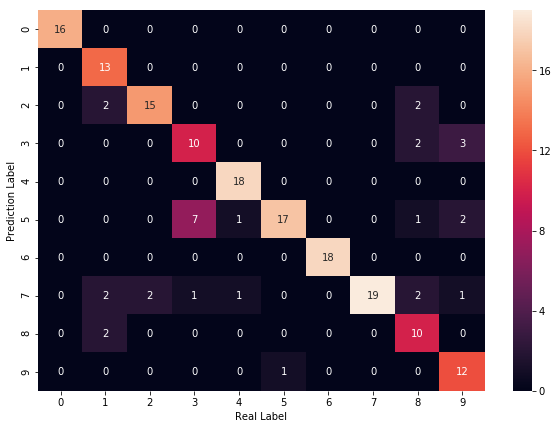

In [14]:
import seaborn as sn


df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.xlabel('Real Label')
plt.ylabel('Prediction Label')
plt.show()

In [15]:
list_P = []
for i,p_value in enumerate(pred_value):
    print("#{} min_error:{} index:{} real:{}".format(i, error_list[i], p_value[0], digits.target[1617+i]))

#0 min_error:22 index:[5] real:5
#1 min_error:29 index:[7] real:2
#2 min_error:34 index:[8] real:8
#3 min_error:4 index:[0] real:0
#4 min_error:24 index:[1] real:1
#5 min_error:12 index:[7] real:7
#6 min_error:16 index:[6] real:6
#7 min_error:19 index:[3] real:3
#8 min_error:10 index:[2] real:2
#9 min_error:29 index:[1] real:1
#10 min_error:31 index:[7] real:7
#11 min_error:28 index:[7] real:4
#12 min_error:13 index:[6] real:6
#13 min_error:18 index:[3] real:3
#14 min_error:24 index:[1] real:1
#15 min_error:28 index:[3] real:3
#16 min_error:27 index:[7] real:9
#17 min_error:20 index:[1] real:1
#18 min_error:26 index:[7] real:7
#19 min_error:8 index:[6] real:6
#20 min_error:28 index:[8] real:8
#21 min_error:10 index:[4] real:4
#22 min_error:18 index:[3] real:3
#23 min_error:30 index:[1] real:1
#24 min_error:14 index:[4] real:4
#25 min_error:9 index:[0] real:0
#26 min_error:19 index:[5] real:5
#27 min_error:15 index:[3] real:3
#28 min_error:21 index:[6] real:6
#29 min_error:24 index:[3 9

In [16]:
pred_value = []
error_list = []

for j in range(1617):
    pred = []
    for i in range(necoc):
        [pred_outputs, real_outputs] = get_pred_real(i, j)
        #print(pred_outputs, real_outputs)
        pred.append(pred_outputs)
    #print(np.array(pred).T)
    
    error = []
    for i in range(10):
        error.append(10 - np.sum(number_codes[i] == np.array(pred).T))
    #print(error)
    
    pred_value.append(np.where(error==np.min(error)))
    error_list.append(np.min(error))
    #print(np.where(error==np.min(error)) )

list_P = []
for i in pred_value:
    if (len(i[0])) == 1:
        list_P.append(i[0][0])
    else:
        random_pick = randint(0, len(i[0])-1)
        list_P.append(i[0][random_pick])
print("Testset acc:{}".format(np.sum(list_P == digits.target[:1617])/1617))
winner_fitness = []
for winner in winner_list:
    #print(winner.fitness)
    winner_fitness.append(winner.fitness)
print("Avg Base Learner:{}".format(np.mean(winner_fitness)))

Testset acc:0.8664192949907236
Avg Base Learner:0.8056462585034015


In [17]:
from random import randint

list_acc = []

for iii in range(necoc):
    pred_value = []
    error_list = []


    for j in range(1617,1617+180):
        pred = []
        for i in range(iii):
            [pred_outputs, real_outputs] = get_pred_real(i, j)
            #print(pred_outputs, real_outputs)
            pred.append(pred_outputs)
        #print(np.array(pred).T)

        error = []
        for i in range(10):
            error.append(iii - np.sum(number_codes[i][:iii] == np.array(pred).T))
        #print(error)

        pred_value.append(np.where(error==np.min(error)))
        error_list.append(np.min(error))
        #print(np.where(error==np.min(error)) )
    list_P = []
    for i in pred_value:
        if (len(i[0])) == 1:
            list_P.append(i[0][0])
        else:
            random_pick = randint(0, len(i[0])-1)
            list_P.append(i[0][random_pick])
    acc = np.sum(list_P == digits.target[1617:])/180
    print("Accuracy on training set: {}".format(acc))
    list_acc.append(acc)

Accuracy on training set: 0.14444444444444443
Accuracy on training set: 0.10555555555555556
Accuracy on training set: 0.17222222222222222
Accuracy on training set: 0.31666666666666665
Accuracy on training set: 0.3388888888888889
Accuracy on training set: 0.4166666666666667
Accuracy on training set: 0.46111111111111114
Accuracy on training set: 0.45555555555555555
Accuracy on training set: 0.49444444444444446
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5222222222222223
Accuracy on training set: 0.5111111111111111
Accuracy on training set: 0.5722222222222222
Accuracy on training set: 0.5833333333333334
Accuracy on training set: 0.5777777777777777
Accuracy on training set: 0.6055555555555555
Accuracy on training set: 0.6388888888888888
Accuracy on training set: 0.65
Accuracy on training set: 0.6277777777777778
Accuracy on training set: 0.6444444444444445
Accuracy on training set: 0.6611111111111111
Accuracy on training set: 0.6666666666666666
Accuracy on train

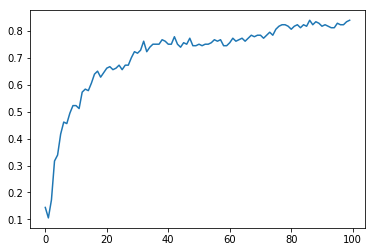

In [18]:
plt.plot(range(necoc),list_acc)
plt.show()

In [19]:
list_acc

[0.14444444444444443,
 0.10555555555555556,
 0.17222222222222222,
 0.31666666666666665,
 0.3388888888888889,
 0.4166666666666667,
 0.46111111111111114,
 0.45555555555555555,
 0.49444444444444446,
 0.5222222222222223,
 0.5222222222222223,
 0.5111111111111111,
 0.5722222222222222,
 0.5833333333333334,
 0.5777777777777777,
 0.6055555555555555,
 0.6388888888888888,
 0.65,
 0.6277777777777778,
 0.6444444444444445,
 0.6611111111111111,
 0.6666666666666666,
 0.6555555555555556,
 0.6611111111111111,
 0.6722222222222223,
 0.6555555555555556,
 0.6722222222222223,
 0.6722222222222223,
 0.7,
 0.7222222222222222,
 0.7166666666666667,
 0.7277777777777777,
 0.7611111111111111,
 0.7222222222222222,
 0.7388888888888889,
 0.75,
 0.75,
 0.75,
 0.7666666666666667,
 0.7611111111111111,
 0.75,
 0.75,
 0.7777777777777778,
 0.75,
 0.7388888888888889,
 0.7555555555555555,
 0.75,
 0.7722222222222223,
 0.7444444444444445,
 0.7444444444444445,
 0.75,
 0.7444444444444445,
 0.75,
 0.75,
 0.7555555555555555,
 0.7666